In [163]:
import pandas as pd
import numpy as np
from nltk import word_tokenize, corpus, stem
import string
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

In [164]:
df = pd.read_csv("spam_ham_dataset.csv")
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [165]:
df['label'].count()

5171

In [166]:
#Stemmers remove morphological affixes from words, leaving only the word stem.
ps = stem.PorterStemmer()

def textpreprocess(text):
    # Storing the sets of punctuation in text_p(ki tu dac biet)
    text_p = "".join([char for char in text if char not in string.punctuation])
    
    #Tokenizers divide strings into lists of substrings.
    words = word_tokenize(text_p)
    
    # stopword = [ 'stop', 'the', 'to', 'and', 'a', 'in', 'it', 'is', 'I', 'that', 'had', 'on', 'for', 'were', 'was']
    stop_words = corpus.stopwords.words('english')
    
    stem_filtered_words = [ps.stem(word) for word in words if word not in stop_words]
    temp = str()
    for i in stem_filtered_words:
        temp += i  + " "
    return temp



In [167]:
processedtext = []
for text in df['text']:
    processedtext.append(textpreprocess(text))

In [168]:
df['Processed'] = processedtext

In [169]:
s = df['label_num'].value_counts()

In [170]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num                          

In [171]:
X,y = df.Processed,df.label_num

In [172]:
x_train , x_test, y_train , y_test = train_test_split(X,y, test_size=0.2)

In [173]:
Vectorizer = CountVectorizer()

In [174]:
x_train_Transform= Vectorizer.fit_transform(x_train.values)

In [176]:
mulNaive = MultinomialNB()

In [177]:
mulNaive.fit(x_train_Transform,y_train.values)

MultinomialNB()

In [178]:
y_predict = mulNaive.predict(Vectorizer.transform(x_test))

In [179]:
error = 0
for i in range(len(y_predict)):
    if y_predict[i] != y_test.values[i]:
        error +=1
error

23

In [180]:
# confusion_matrix (y_test , y_predict)
# accuracy_score(y_test, y_predict)

In [181]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

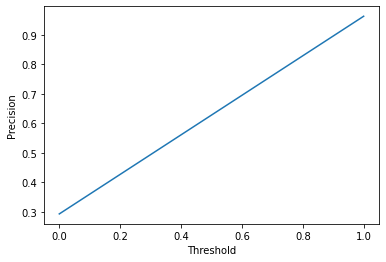

In [182]:
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.plot(thresholds, precision[:-1])
plt.show()

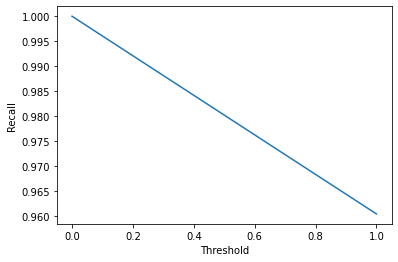

In [183]:
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.plot(thresholds, recall[:-1])
plt.show()

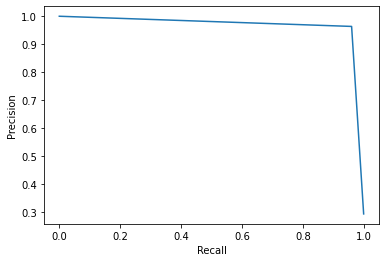

In [184]:
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall, precision)
plt.show()

In [185]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       732
           1       0.96      0.96      0.96       303

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [186]:
Decision_Tree = tree.DecisionTreeClassifier()

In [187]:
Decision_Tree.fit(x_train_Transform, y_train.values)

DecisionTreeClassifier()

In [188]:
y_predict = Decision_Tree.predict(Vectorizer.transform(x_test))

In [189]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

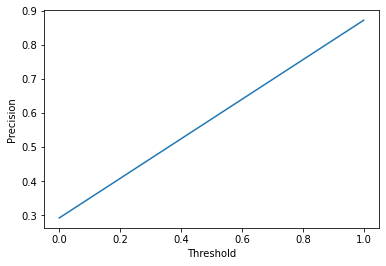

In [190]:
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.plot(thresholds, precision[:-1])
plt.show()

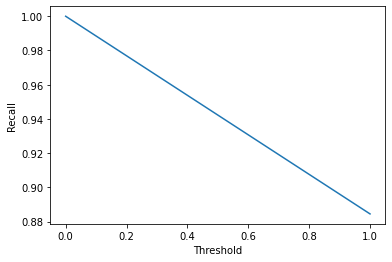

In [191]:
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.plot(thresholds, recall[:-1])
plt.show()

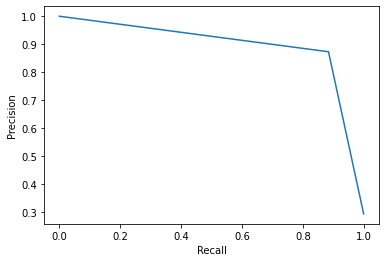

In [192]:
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall, precision)
plt.show()

In [193]:
#decision Tree
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       732
           1       0.87      0.88      0.88       303

    accuracy                           0.93      1035
   macro avg       0.91      0.92      0.91      1035
weighted avg       0.93      0.93      0.93      1035



In [194]:
from sklearn import neighbors
k_neighbors = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)

In [195]:
k_neighbors.fit(x_train_Transform, y_train.values)

KNeighborsClassifier(n_neighbors=1)

In [202]:
y_predict = k_neighbors.predict(Vectorizer.transform(x_test))

In [203]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)

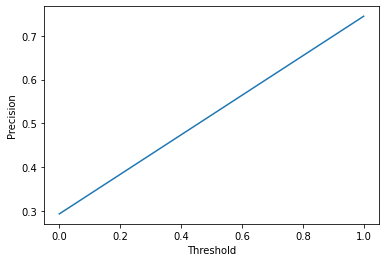

In [204]:
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.plot(thresholds, precision[:-1])
plt.show()

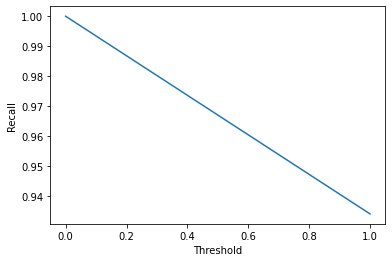

In [205]:
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.plot(thresholds, recall[:-1])
plt.show()

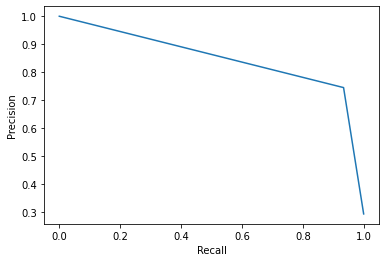

In [206]:
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall, precision)
plt.show()

In [208]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       732
           1       0.74      0.93      0.83       303

    accuracy                           0.89      1035
   macro avg       0.86      0.90      0.87      1035
weighted avg       0.90      0.89      0.89      1035

